orian siani

318846607


# mini project

**Part 1 – NumPy, Matplotlib/Seaborn:**

question 1

**a.**

covariance measures how two variables change together, calculated by the formula:

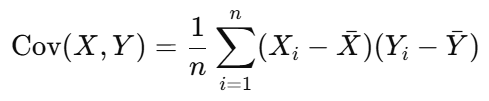

A positive covariance means that as one variable increases, the other tends to increase too

Correlation, on the other hand, normalizes covariance to give a standardized measure of how strongly two variables are related. The formula for correlation is:

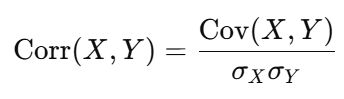

Correlation ranges from -1 to 1, with values close to 1 or -1 that show a strong relationship, and values close to 0 showing no relationship.

correlation is just a scaled version of covariance, making it easier to interpret and compare relationships between different pairs of variables.

**b.**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# loading the iris dataset
iris = sns.load_dataset("iris")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


Using visualization to explore the relationship between the different features.

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


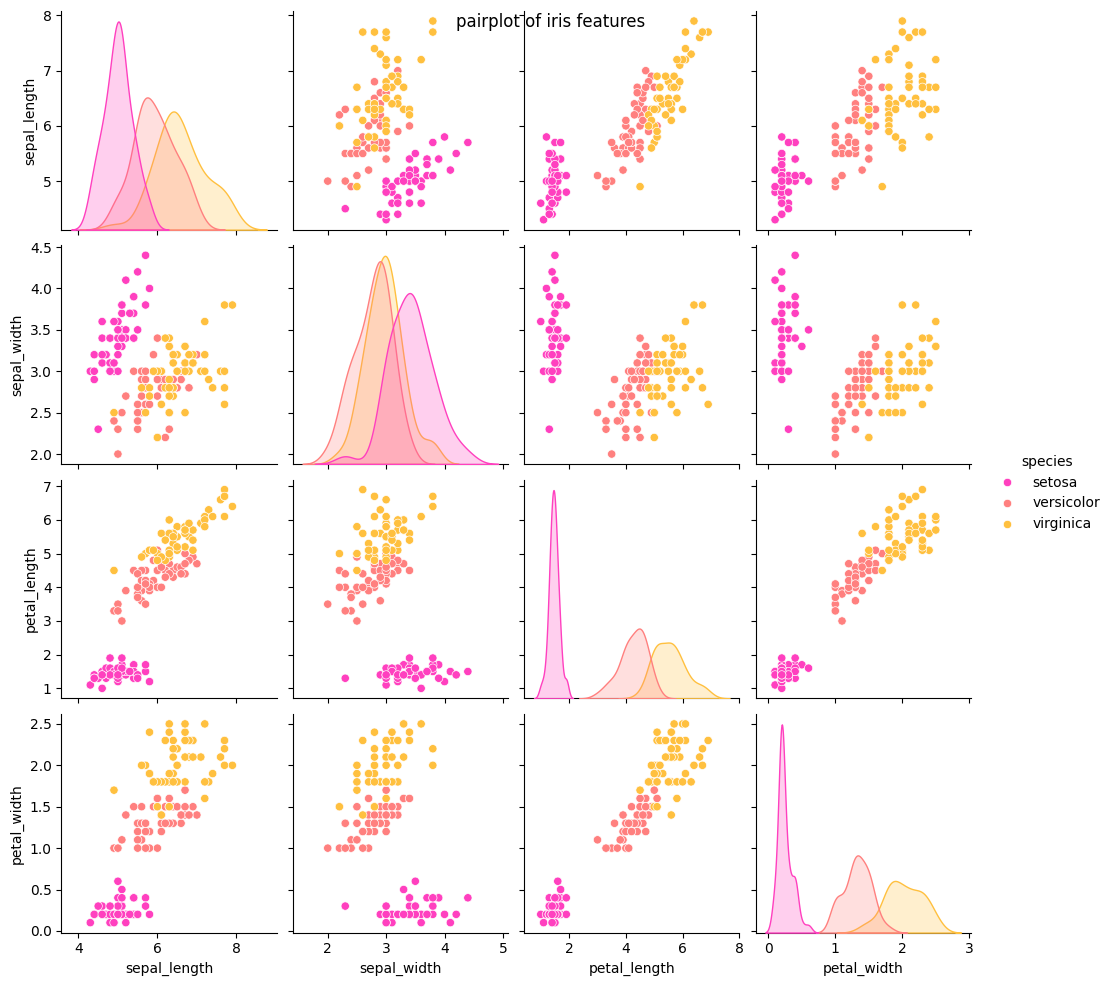

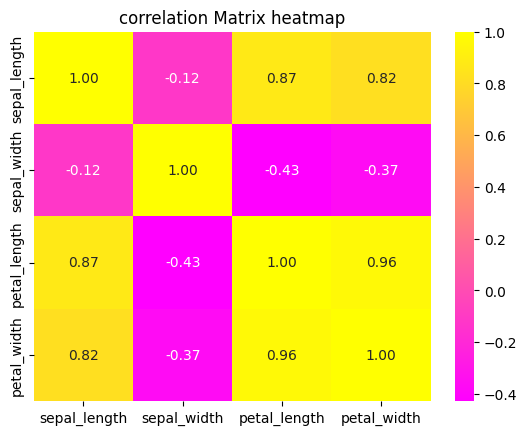

In [3]:
iris_features = iris.select_dtypes(include=[np.number]) #taking only numeric type data
cov_matrix = np.cov(iris_features.T) #computing the covariance matrix

#correlation matrix
std_dev = np.sqrt(np.diag(cov_matrix))
corr_matrix = cov_matrix / np.outer(std_dev, std_dev)
corr_matrix[np.isnan(corr_matrix)] = 0  #turning to zero nans that happened by dividing by zero

print(cov_matrix)
print(corr_matrix)
#pairplot to see relationships between features
sns.pairplot(iris, hue='species', diag_kind='kde', palette='spring')
plt.suptitle('pairplot of iris features')
plt.show()

#plotting correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='spring',xticklabels=iris_features.columns, yticklabels=iris_features.columns)
plt.title("correlation Matrix heatmap")
plt.show()


**c.**

implementing functions

In [4]:
# a function that calculates the covariance
def calcCov(x, y):
    n = len(x)
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covariance = np.sum((x - mean_x)*(y - mean_y))/(n - 1)
    return covariance

# a function that calculates the covariance matrix
def covMat(data):
    data = np.array(data) #converting the data to an array if needed
    n_features = data.shape[1]
    covariance_matrix = np.zeros((n_features, n_features))
    for i in range(n_features):
        for j in range(n_features):
            covariance_matrix[i, j] = calcCov(data[:, i], data[:, j]) #using calcCov to compute the covariance for each feature pair
    return covariance_matrix

iris_features = iris.select_dtypes(include=[np.number]) #selecting only numeric data types for the calculations

#computing and displaying the covariance matrix
covariance_matrix = covMat(iris_features.values)
print(covariance_matrix)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


**d.**

testing-comparing the results of my function with NumPy's

In [5]:
numpy_cov_matrix = np.cov(iris_features.values, rowvar=False)

#checking if the two matrices are the same
comparing = np.allclose(covariance_matrix,numpy_cov_matrix,atol=1e-8)
print(comparing)

True


**e.**

In [6]:
#a function that calculates the correlation matrix using the covariance matrix
def corrMat(data):
    covariance_matrix = covMat(data) #computing the covariance matrix
    std_devs = np.sqrt(np.diag(covariance_matrix)) # calculating the stds for each feature

    # computing the correlation matrix
    correlation_matrix = covariance_matrix / np.outer(std_devs, std_devs)
    correlation_matrix[np.isnan(correlation_matrix)] = 0  ##turning to zero nans that happened by dividing by zero

    return correlation_matrix

#the correlation matrix for the iris dataset
correlation_matrix = corrMat(iris_features.values)
print(correlation_matrix)


[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


**f.**

testing #2

In [7]:
#the correlation matrix using numpy's function
numpy_corr_matrix = np.corrcoef(iris_features.values, rowvar=False)

print(correlation_matrix) #my function
print(numpy_corr_matrix) #numpy's function

#checking if the two matrices are the same
comparing2 = np.allclose(correlation_matrix, numpy_corr_matrix, atol=1e-8)
print(comparing2)


[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
True


**g.**

visualizing our tests results

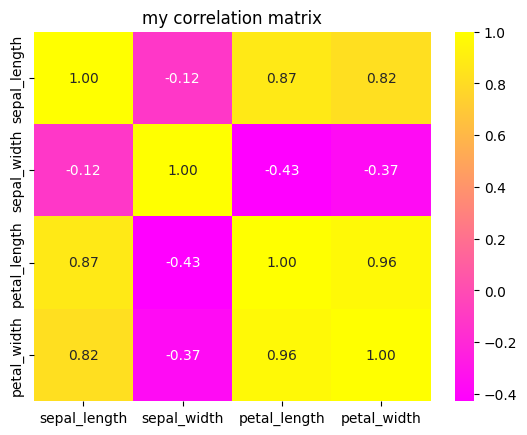

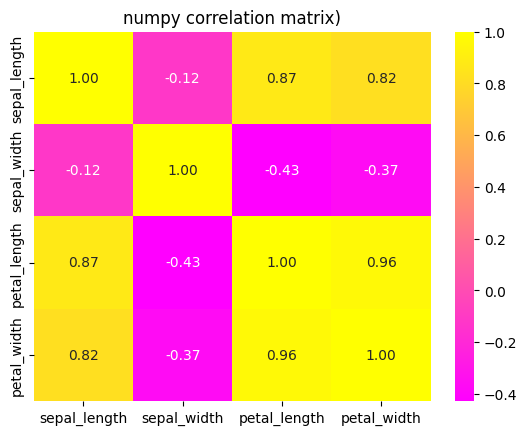

In [8]:
# correlation matrix heatmap using my functions
sns.heatmap(correlation_matrix, annot=True, cmap='spring', fmt='.2f',xticklabels=iris_features.columns,yticklabels=iris_features.columns)
plt.title('my correlation matrix')
plt.show()

#correlation matrix heatmap using numpy's function
sns.heatmap(numpy_corr_matrix, annot=True,cmap='spring',fmt='.2f',xticklabels=iris_features.columns,yticklabels=iris_features.columns)
plt.title('numpy correlation matrix)')
plt.show()


**Part 2 – NumPy, Pandas, MatPlotLib/Seaborn/Plotly:**

question 2


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive

#importing dataset
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/laptop_price - dataset.csv'
data = pd.read_csv(file_path)
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

     

plotting the price of all leptops

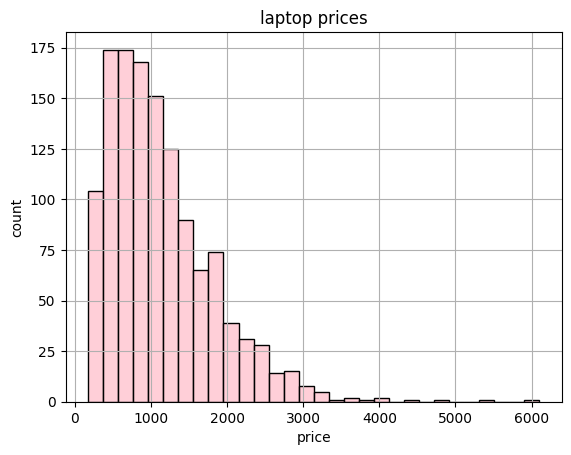

In [21]:
sns.histplot(data['Price (Euro)'], bins=30, color='pink')
plt.title('laptop prices')
plt.xlabel('price')
plt.ylabel('count')
plt.grid(True)
plt.show()

Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [22]:
#calculating the average price for each company
average_prices = data.groupby('Company')['Price (Euro)'].mean().sort_values(ascending=False)
print(average_prices)

print(f"\nthe most expensive company- {average_prices.idxmax()} the average price- {average_prices.max():.2f} ")

Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64

the most expensive company- Razer the average price- 3346.14 


Find the different types of Operating systems present in the data - under the column name "OpSys".

In [23]:
#checking how many types of os there are and what are the types
unique_os = data['OpSys'].unique()
print(unique_os)
# creating mapping for each type
os_mapping = {
    'macOS': 'Mac OS',
    'Mac OS X': 'Mac OS',
    'Windows 10': 'Windows',
    'Windows 10 S': 'Windows',
    'Windows 7': 'Windows',
    'No OS': 'No OS',
    'Linux': 'Linux',
    'Chrome OS': 'Chrome OS',
    'Android': 'Android',
}

#apply the mapping
data['OpSys'] = data['OpSys'].replace(os_mapping)
unique_os_uniform = data['OpSys'].unique()
print(unique_os_uniform)

# Count the number of laptops for each os
os_counts = data['OpSys'].value_counts()
print(os_counts)

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']
OpSys
Windows      1101
No OS          66
Linux          58
Chrome OS      27
Mac OS         21
Android         2
Name: count, dtype: int64


Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

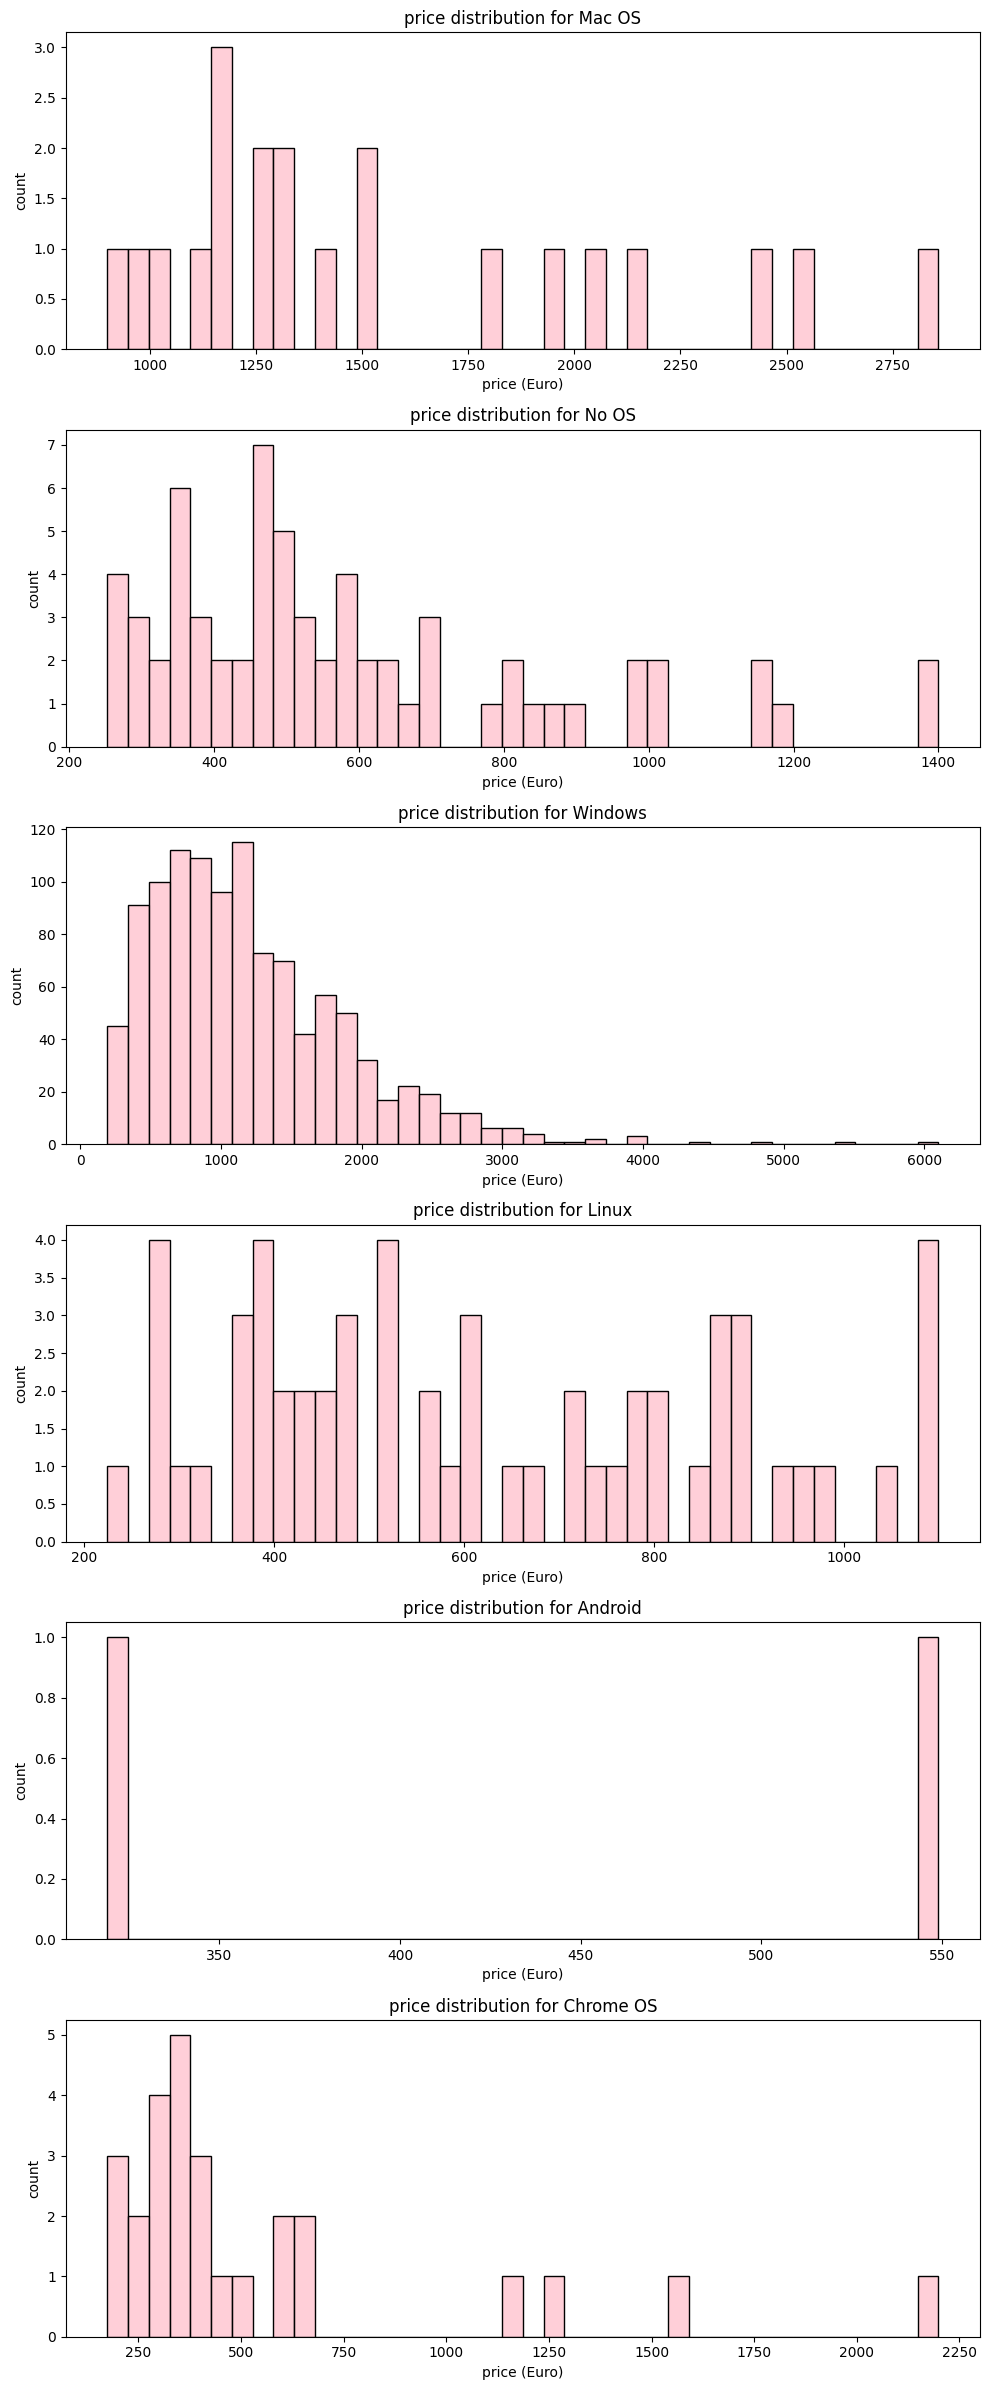

In [29]:
#plotting the price distribution for each os type
plt.figure(figsize=(10, len(unique_os_uniform) * 4))  # fixing figure size for every OS type

for i, os_type in enumerate(unique_os_uniform, start=1):
    plt.subplot(len(unique_os_uniform), 1, i)
    sns.histplot(data[data['OpSys'] == os_type]['Price (Euro)'],bins= 40,color='pink')
    plt.title(f'price distribution for {os_type}')
    plt.xlabel('price (Euro)')
    plt.ylabel('count')

plt.tight_layout()  # fixing overlap
plt.show()


What is the relationship between RAM and computer price? add an adequate plot to support your findings.

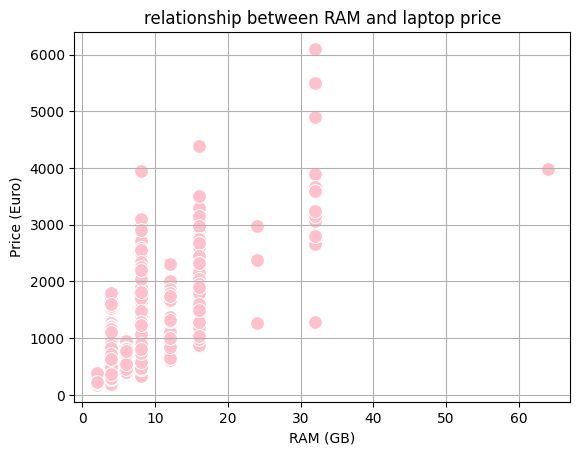

In [31]:
# scatter plot to show the relationship between RAM and price
sns.scatterplot(data=data, x='RAM (GB)', y='Price (Euro)', color='pink', s=100)
plt.title('relationship between RAM and laptop price')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.grid(True)
plt.show()


Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".

In [32]:
#extract the storage type from the memory column
data['Storage type'] = data['Memory'].str.extract(r'(\bSSD\b|\bHDD\b|\bFlash Storage\b|\beMMC\b|\bHybrid\b)', expand=False)
print(data[['Memory', 'Storage type']].head()) #checking to see if it worked


                Memory   Storage type
0            128GB SSD            SSD
1  128GB Flash Storage  Flash Storage
2            256GB SSD            SSD
3            512GB SSD            SSD
4            256GB SSD            SSD


Think of additional questions related to this data. What types of analyses and visualizations would you use to address them? Select two questions from your list and implement. Submit your list of questions, suggested analyses and visualizations and the implementation.

1. What is the average price of laptops with different CPU types?
2. What is the relationship between screen resolution and price?
3. What is the relationship between laptop weight and price?
4. What is the relationship between screen inches and price?

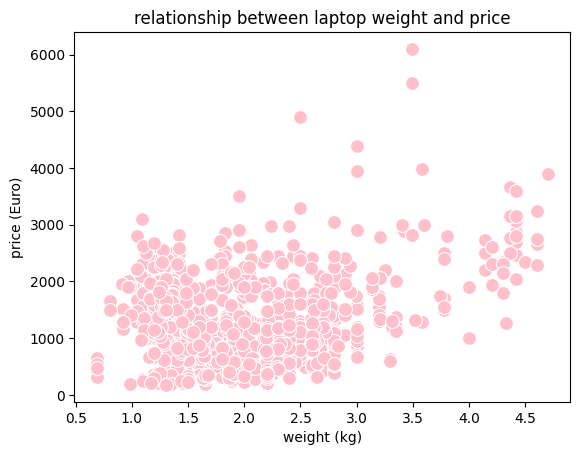

the correlation between weight and price: 0.21


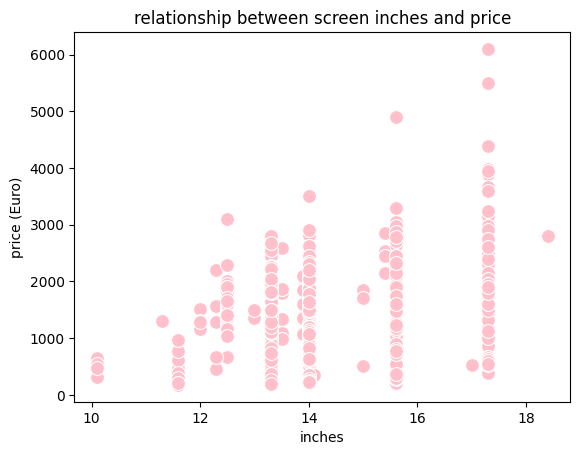

the correlation between inches and price: 0.07


In [40]:
#implementing question 3-
# checking the relationship between laptop weight and price
sns.scatterplot(data=data, x='Weight (kg)', y='Price (Euro)', color='pink', s=100)
plt.title('relationship between laptop weight and price')
plt.xlabel('weight (kg)')
plt.ylabel('price (Euro)')
plt.show()

#calculate and print the correlation between Weight and Price
correlation = data['Weight (kg)'].corr(data['Price (Euro)'])
print(f"the correlation between weight and price: {correlation:.2f}")

#implementing question 4-
## checking the relationship between screen inches and price
sns.scatterplot(data=data, x='Inches', y='Price (Euro)', color='pink',s=100)
plt.title('relationship between screen inches and price')
plt.xlabel('inches')
plt.ylabel('price (Euro)')
plt.show()
correlation2 = data['Inches'].corr(data['Price (Euro)'])
print(f"the correlation between inches and price: {correlation2:.2f}")